# 1. Import required libraries, tools and dataset

In [177]:
import pandas as pd                                           #Data analysis and manipuation 
import numpy as np                                            #Numerical computing
import matplotlib.pyplot as plt                               #Graphical plotting and visualization
import seaborn as sns                                         #Statical graphics
from sklearn.preprocessing import StandardScaler              #Data preprocessing 
from sklearn.model_selection import train_test_split          #Machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [179]:
#load dataset
df = pd.read_excel("AirQualityUCI.xlsx") 

In [180]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


# 2. Data Inspection, Preprocessing and Cleaning

In [182]:
#Check shape
df.shape

(9357, 15)

In [183]:
#Check column names
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [184]:
#Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [185]:
# Replace -200 (INVALID SENSOR VALUE) with NaN
df.replace(-200, np.nan, inplace=True)

In [186]:
df.head

<bound method NDFrame.head of            Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0    2004-03-10  18:00:00     2.6      1360.00     150.0  11.881723   
1    2004-03-10  19:00:00     2.0      1292.25     112.0   9.397165   
2    2004-03-10  20:00:00     2.2      1402.00      88.0   8.997817   
3    2004-03-10  21:00:00     2.2      1375.50      80.0   9.228796   
4    2004-03-10  22:00:00     1.6      1272.25      51.0   6.518224   
...         ...       ...     ...          ...       ...        ...   
9352 2005-04-04  10:00:00     3.1      1314.25       NaN  13.529605   
9353 2005-04-04  11:00:00     2.4      1162.50       NaN  11.355157   
9354 2005-04-04  12:00:00     2.4      1142.00       NaN  12.374538   
9355 2005-04-04  13:00:00     2.1      1002.50       NaN   9.547187   
9356 2005-04-04  14:00:00     2.2      1070.75       NaN  11.932060   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0           1045.50    166.0       1056.25    11

In [187]:
#Check missing values
df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [188]:
#Fill missing values with column mean
df.fillna(df.mean(numeric_only=True), inplace=True)

In [189]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H.%M.%S', errors='coerce')

In [190]:
df = df.drop(columns=['Date', 'Time'])

In [191]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


# 3. Exploratory Data Analysis (EDA)

In [193]:
#Summary stats table of the dataset
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.152750,1099.707856,218.811816,10.082993,939.029205,246.881252,835.370973,113.075515,1456.143486,1022.780725,18.316054,49.232360,1.025530
std,1.316068,212.796116,63.870229,7.302474,261.557856,193.419417,251.741784,43.911095,339.365351,390.609000,8.658396,16.974308,0.395836
min,0.100000,647.250000,7.000000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679
25%,1.200000,941.250000,218.811816,4.591495,742.500000,112.000000,665.500000,85.900000,1241.500000,741.750000,12.025000,36.550000,0.746115
50%,2.152750,1074.500000,218.811816,8.593367,923.250000,229.000000,817.500000,113.075515,1456.143486,982.500000,18.275000,49.232360,1.015441
75%,2.600000,1221.250000,218.811816,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


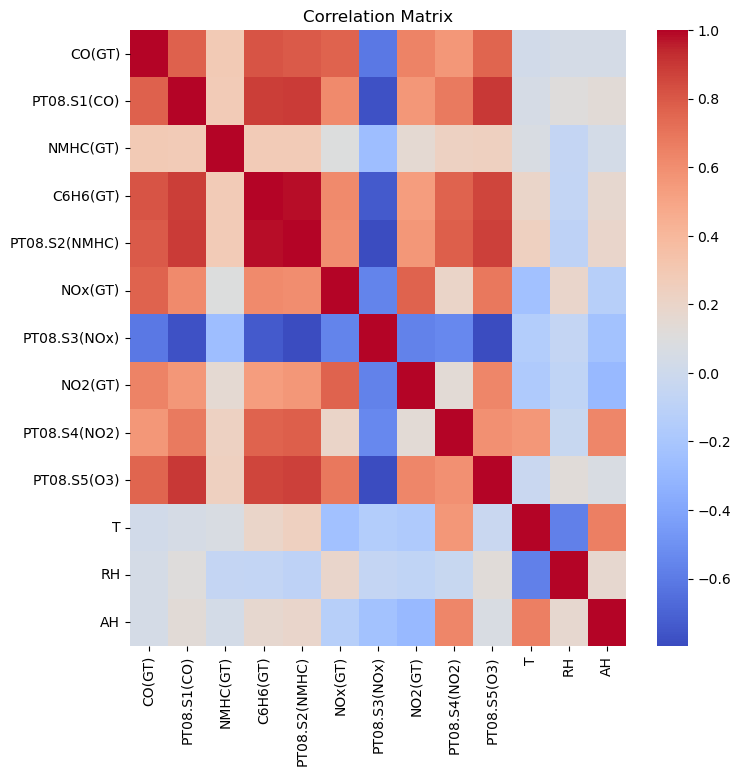

In [194]:
# Coorelation heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

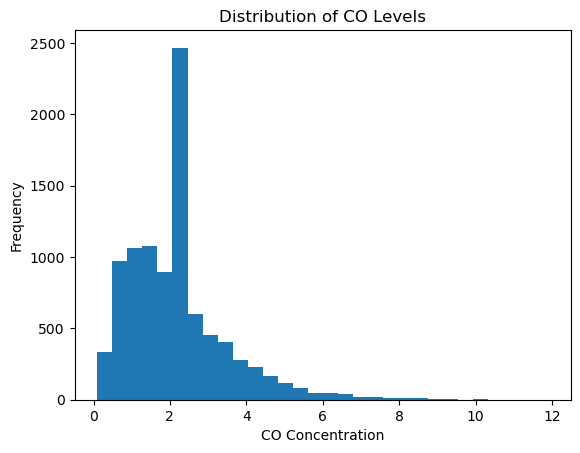

In [195]:
# Distribution (Histogram) of target variable (CO)
plt.hist(df['CO(GT)'], bins=30)
plt.xlabel("CO Concentration")
plt.ylabel("Frequency")
plt.title("Distribution of CO Levels")
plt.show()

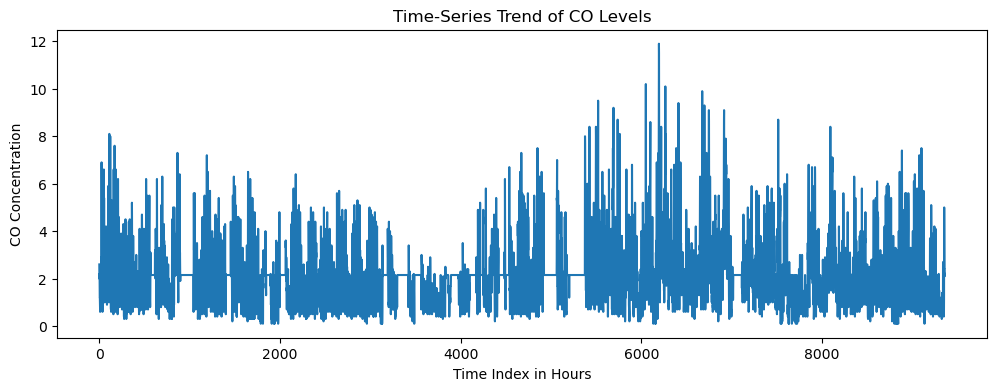

In [196]:
#Time-series trend of CO levels (Histogram)
plt.figure(figsize=(12,4))
plt.plot(df['CO(GT)'])
plt.xlabel("Time Index in Hours")
plt.ylabel("CO Concentration")
plt.title("Time-Series Trend of CO Levels")
plt.show()

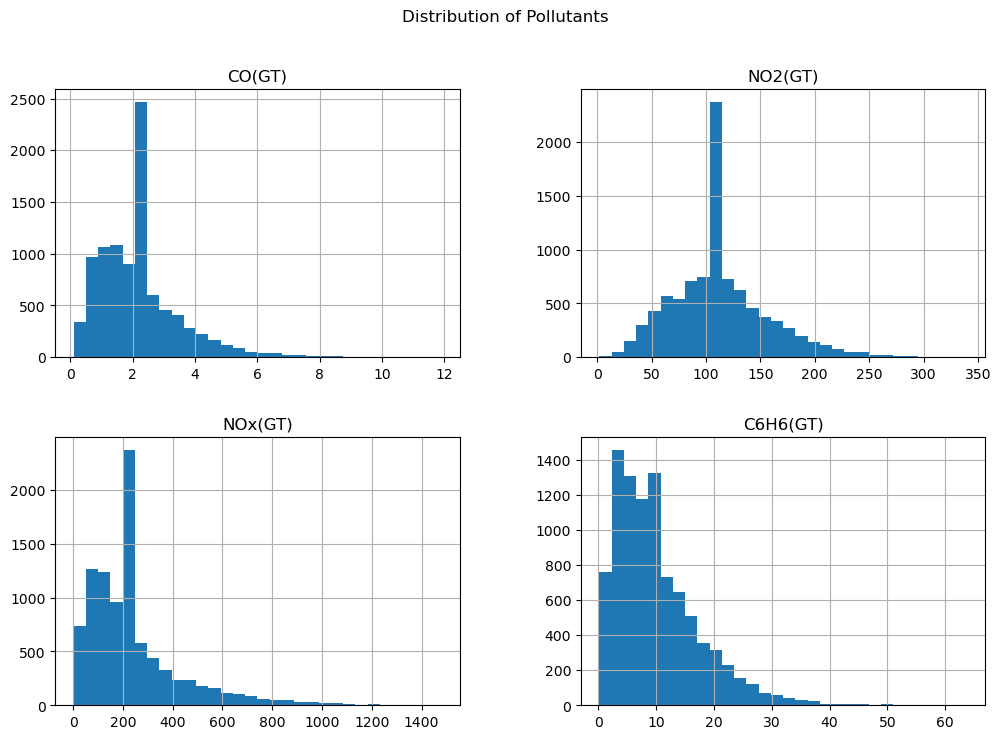

In [197]:
#Distribution of pollutants (Histogram)
pollutants = ['CO(GT)', 'NO2(GT)', 'NOx(GT)', 'C6H6(GT)']

df[pollutants].hist(bins=30, figsize=(12,8))
plt.suptitle("Distribution of Pollutants")
plt.show()

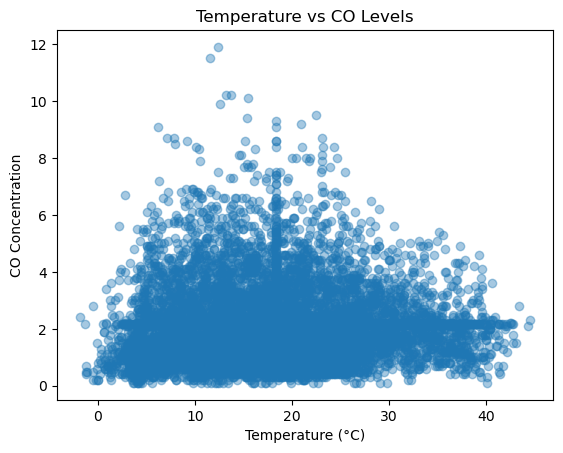

In [198]:
#Scatter plot for effect of temperature on Pollution
plt.scatter(df['T'], df['CO(GT)'], alpha=0.4)
plt.xlabel("Temperature (°C)")
plt.ylabel("CO Concentration")
plt.title("Temperature vs CO Levels")
plt.show()

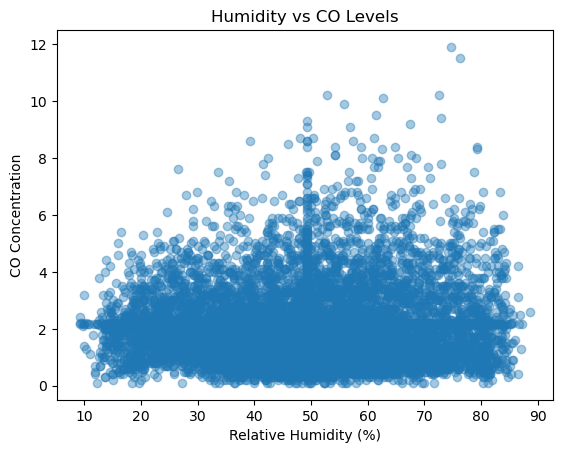

In [199]:
#Scatter plot for effect of Humidity on Pollution
plt.scatter(df['RH'], df['CO(GT)'], alpha=0.4)
plt.xlabel("Relative Humidity (%)")
plt.ylabel("CO Concentration")
plt.title("Humidity vs CO Levels")
plt.show()

# 4. Data preprocessing and Model validation

In [203]:
# INDEPENDENT VARIABLES
X = df.drop(columns=['CO(GT)'])

# DEPENDENT VARIABLE
y = df['CO(GT)']

In [215]:
# INITIALIZE STANDARD SCALER
scaler = StandardScaler()

# APPLY SCALING
X_scaled = scaler.fit_transform(X)

In [216]:
# SPLIT INTO TRAINING AND TESTING SETS
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.4, random_state=42
)

In [243]:
# Define evaluation function
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "R2": r2}

## 4.1 Linear Regression

In [218]:
# Initialize linear regression
lr_model = LinearRegression()

In [221]:
# Train linear regression model
lr_model.fit(X_train, y_train)

LinearRegression()

In [249]:
# Generate linear regression model prediction
lr_pred = lr_model.predict(X_test)

lr_pred

array([1.42184348, 0.93674842, 2.59307238, ..., 0.92616004, 1.76768617,
       3.19441081])

In [251]:
#Performance evaluation of the Linear Regression model using test data
lr_metrics = evaluate_model(y_test, lr_pred)

# Display the evaluation results with appropriate labels
print("Linear Regression Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {lr_metrics['MSE']:.4f}")
print(f"Root Mean Squared Error (RMSE): {lr_metrics['RMSE']:.4f}")
print(f"R-squared (R²): {lr_metrics['R2']:.4f}")

Linear Regression Evaluation Metrics:
Mean Squared Error (MSE): 0.3320
Root Mean Squared Error (RMSE): 0.5762
R-squared (R²): 0.8180


## 4.2 Random Forest Regressor

In [256]:
#Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [258]:
#Train Random Forest Regressor model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [264]:
#Generate Random Forest Regressor model prediction
rf_pred = rf_model.predict(X_test)

rf_pred

array([1.39043993, 0.93121996, 2.795     , ..., 0.48958249, 2.02542976,
       3.43632995])

In [283]:
#Performance evaluation of the Random Forest Regression model using test data
rf_metrics = evaluate_model(y_test, rf_pred)

# Display the evaluation results with appropriate labels
print("Random Forest Regression Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {rf_metrics['MSE']:.4f}")
print(f"Root Mean Squared Error (RMSE): {rf_metrics['RMSE']:.4f}")
print(f"R-squared (R²): {rf_metrics['R2']:.4f}")

Random Forest Regression Evaluation Metrics:
Mean Squared Error (MSE): 0.2429
Root Mean Squared Error (RMSE): 0.4928
R-squared (R²): 0.8669


## 4.3 K-Nearest Neighbors (KNN) Regressor 

In [270]:
#Initialize KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)

In [272]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [277]:
#Generate KNN Regressor model prediction
knn_pred = knn_model.predict(X_test)

knn_pred

array([1.32      , 1.17054991, 2.88      , ..., 0.56      , 1.75054991,
       3.4       ])

In [285]:
#Performance evaluation of the KNN Regression model using test data
knn_metrics = evaluate_model(y_test, knn_pred)

# Display the evaluation results with appropriate labels
print("KNN Regression Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {knn_metrics['MSE']:.4f}")
print(f"Root Mean Squared Error (RMSE): {knn_metrics['RMSE']:.4f}")
print(f"R-squared (R²): {knn_metrics['R2']:.4f}")

KNN Regression Evaluation Metrics:
Mean Squared Error (MSE): 0.2750
Root Mean Squared Error (RMSE): 0.5244
R-squared (R²): 0.8493


# 5. Result Comparison, Visualization and Outputs

In [296]:
#Result Table
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "KNN Regressor"],
    "MSE": [lr_metrics["MSE"], rf_metrics["MSE"], knn_metrics["MSE"]],
    "RMSE": [lr_metrics["RMSE"], rf_metrics["RMSE"], knn_metrics["RMSE"]],
    "R2 Score": [lr_metrics["R2"], rf_metrics["R2"], knn_metrics["R2"]]
})

results

,Model,MSE,RMSE,R2 Score
0,Linear Regression,0.332046,0.576235,0.818012
1,Random Forest,0.242891,0.492840,0.866876
2,KNN Regressor,0.274999,0.524404,0.849278


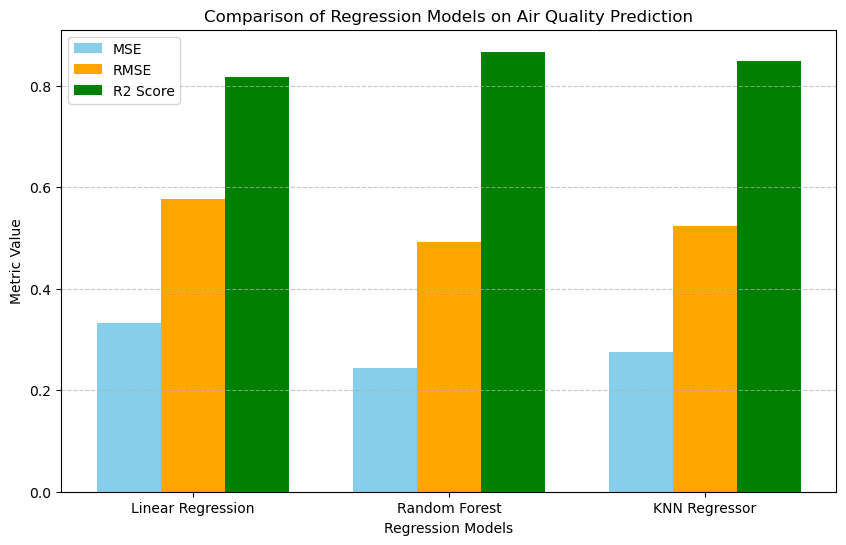

In [356]:
plt.figure(figsize=(10,6))

# Models and metrics
models = results['Model']
mse = results['MSE']
rmse = results['RMSE']
r2 = results['R2 Score']

# Define bar width and positions
x = np.arange(len(models))
width = 0.25

# Plot bars
plt.bar(x - width, mse, width, label='MSE', color='skyblue')
plt.bar(x, rmse, width, label='RMSE', color='orange')
plt.bar(x + width, r2, width, label='R2 Score', color='green')

# Labels and title
plt.xlabel('Regression Models')
plt.ylabel('Metric Value')
plt.title('Comparison of Regression Models on Air Quality Prediction')
plt.xticks(x, models)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [344]:
#Table: Actual VS Predicted of Linear Regressor
prediction_table_lr = pd.DataFrame({
    "Actual_CO": y_test.values,
    "Predicted_CO": lr_pred
})

prediction_table_lr.head(10)

,Actual_CO,Predicted_CO
0,1.30000,1.421843
1,2.15275,0.936748
2,2.60000,2.593072
3,3.10000,2.887185
4,1.30000,1.880894
5,2.15275,1.634039
6,1.40000,1.439214
7,1.80000,2.098259
8,1.10000,1.357110
9,1.00000,1.259109


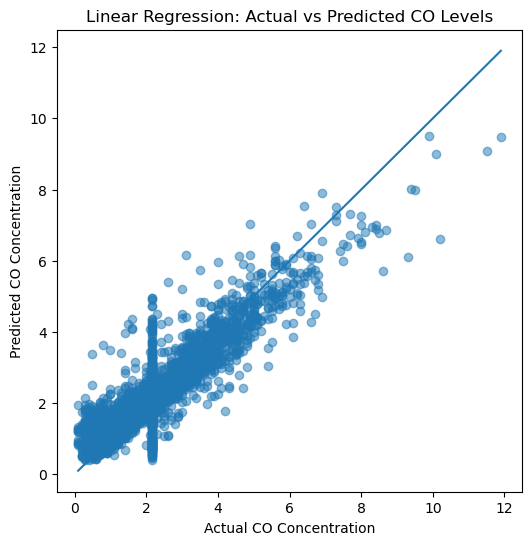

In [308]:
#Figure (Scatter plot): Actual VS Predicted of Linear Regressor
plt.figure(figsize=(6,6))
plt.scatter(y_test, lr_pred, alpha=0.5)
plt.xlabel("Actual CO Concentration")
plt.ylabel("Predicted CO Concentration")
plt.title("Linear Regression: Actual vs Predicted CO Levels")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.show()

In [346]:
#Table: Actual VS Predicted of KNN Regressor
prediction_table_knn = pd.DataFrame({
    "Actual_CO": y_test.values,
    "Predicted_CO": knn_pred
})

prediction_table_knn.head(10)

,Actual_CO,Predicted_CO
0,1.30000,1.32000
1,2.15275,1.17055
2,2.60000,2.88000
3,3.10000,2.54000
4,1.30000,1.74000
5,2.15275,1.95165
6,1.40000,1.92000
7,1.80000,1.98000
8,1.10000,1.49055
9,1.00000,0.86000


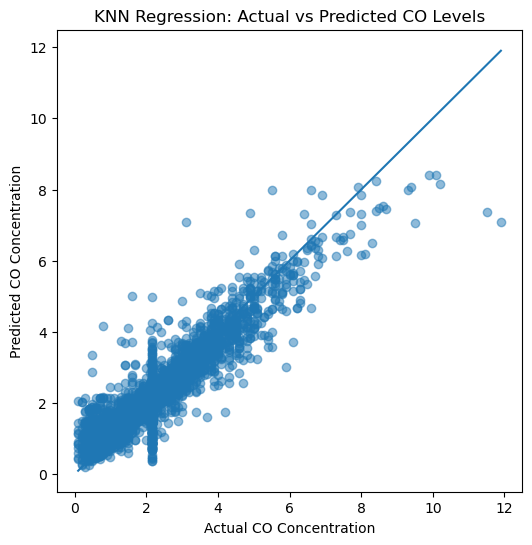

In [316]:
#Figure (Scatter plot): Actual VS Predicted of KNN Regressor
plt.figure(figsize=(6,6))
plt.scatter(y_test, knn_pred, alpha=0.5)
plt.xlabel("Actual CO Concentration")
plt.ylabel("Predicted CO Concentration")
plt.title("KNN Regression: Actual vs Predicted CO Levels")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.show()

In [348]:
#Table: Actual VS Predicted of Random Forest Regressor
prediction_table_rf = pd.DataFrame({
    "Actual_CO": y_test.values,
    "Predicted_CO": rf_pred
})

prediction_table_rf.head(10)

,Actual_CO,Predicted_CO
0,1.30000,1.390440
1,2.15275,0.931220
2,2.60000,2.795000
3,3.10000,3.047000
4,1.30000,1.703582
5,2.15275,1.476660
6,1.40000,1.301637
7,1.80000,1.978747
8,1.10000,1.647880
9,1.00000,0.994385


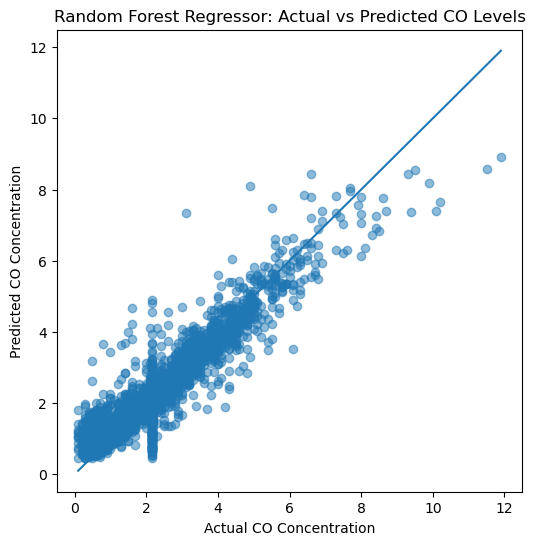

In [324]:
#Figure (Scatter plot): Actual VS Predicted of Random Forest Regressor
plt.figure(figsize=(6,6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.xlabel("Actual CO Concentration")
plt.ylabel("Predicted CO Concentration")
plt.title("Random Forest Regressor: Actual vs Predicted CO Levels")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.show()

In [350]:
#Best model based on MSE
best_model_mse = results.sort_values(by="MSE").iloc[0]
best_model_mse

Model       Random Forest
MSE              0.242891
RMSE              0.49284
R2 Score         0.866876
Name: 1, dtype: object

In [352]:
#Best model based on RMSE
best_model_rmse = results.sort_values(by="RMSE").iloc[0]
best_model_rmse

Model       Random Forest
MSE              0.242891
RMSE              0.49284
R2 Score         0.866876
Name: 1, dtype: object

In [354]:
#Best model based on R2 Score
best_model_r2 = results.sort_values(by="R2 Score").iloc[0]
best_model_r2

Model       Linear Regression
MSE                  0.332046
RMSE                 0.576235
R2 Score             0.818012
Name: 0, dtype: object